In [6]:
pip install WordCloud


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: six>=1.5 in c:\users\piyush\anaconda3\lib\site-packages (from python-dateutil>=2.1->matplotlib->WordCloud) (1.15.0)



In [2]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [9]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [27]:
# Login File contains twitter consumerkey, consumerSecret, accessToken,accessTokenSecret
csvfile = pd.read_csv("Login.csv")

In [28]:
csvfile

,Data
0,ZkYFSbvBeaUlYZ4i0bTJ8oZK5
1,comSGIc5zuMOXLKUmt9UB0qH71RnvNAxaDzoLKUsIwdskS...
2,1386557733533478918-jXQvanwb9mndJCrKFZ5INoKHcT...
3,Nlu2um3bgT0QCorILbVMAImcEq8iHu9OgcTLHeLJ9kVLQ


In [29]:
consumerkey = csvfile.Data[0]
consumerSecret = csvfile.Data[1]
accessToken = csvfile.Data[2]
accessTokenSecret = csvfile.Data[3]
    

In [30]:
authenticate = tweepy.OAuthHandler(consumerkey,consumerSecret)

In [31]:
authenticate.set_access_token(accessToken, accessTokenSecret)

In [32]:
api =tweepy.API(authenticate,wait_on_rate_limit= True)

In [36]:
# extract tweets from twitter user
posts = api.user_timeline(screen_name="BillGates",count=100, lang = "en", tweet_mode="extended")

In [39]:
print("show the 5 recent tweets:  \n")
i=1
for tweet in posts[0:5]:
    print(str(i)+ ')' +tweet.full_text + '\n')
    i= i+1

show the 5 recent tweets:  

1)RT @WHO: The @ACTAccelerator, an unprecedented global alliance to develop &amp; deliver the tests, treatments &amp; vaccines the 🌐 needs to fight #…

2)I was honored to speak at today’s #LeadersClimateSummit about the three things we need to do to avoid a climate disaster. https://t.co/0YJJyabeIn

3)Ambitious short-term goals like this are critical to moving closer to a net-zero future. As we rapidly scale the solutions we have, we must also invest in innovation to reach our ultimate goals. Thank you @POTUS for your leadership. https://t.co/SVeKp1KPHT

4)It’s encouraging to see @POTUS Biden and @ClimateEnvoy Kerry re-establish America’s leading role on climate change. I look forward to joining leaders from around the world to talk about some of the most important challenges we need to overcome to avoid a climate disaster. https://t.co/a9CXZzIg6Y

5)Yesterday's verdict was a step in the right direction. But one court ruling alone will not bring to an end t

In [40]:
# create dataframe
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

In [41]:
df

,Tweets
0,"RT @WHO: The @ACTAccelerator, an unprecedented..."
1,I was honored to speak at today’s #LeadersClim...
2,Ambitious short-term goals like this are criti...
3,It’s encouraging to see @POTUS Biden and @Clim...
4,Yesterday's verdict was a step in the right di...
...,...
95,This book has nothing to do with viruses or pa...
96,Monoclonal antibodies are one of the most prom...
97,RT @AlzData: We’re looking for new ways to adv...
98,"Like many people, I’ve tried to deepen my unde..."


In [42]:
# clean the data
def clean(text):
    text = re.sub(r'@[a-zA-Z0-9]+', '', text) # r means it tell the python its a raw string  # remove @mentions
    text = re.sub(r'#','',text)
    text = re.sub(r'RT[\s]+','', text) # removing RT
    text = re.sub(r'https?:\/\/\S+','',text) # remove hyper link
    return text
    
    

In [43]:
df['Tweets'] =df['Tweets'].apply(clean)

# cleaning text
df

,Tweets
0,": The , an unprecedented global alliance to de..."
1,I was honored to speak at today’s LeadersClima...
2,Ambitious short-term goals like this are criti...
3,It’s encouraging to see Biden and Kerry re-e...
4,Yesterday's verdict was a step in the right di...
...,...
95,This book has nothing to do with viruses or pa...
96,Monoclonal antibodies are one of the most prom...
97,: We’re looking for new ways to advance Alzhei...
98,"Like many people, I’ve tried to deepen my unde..."


In [44]:
# create a function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Crete to get polarity
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [45]:
# create two new columns
df['subjectivity'] = df['Tweets'].apply(getSubjectivity)

df['polarity'] = df['Tweets'].apply(polarity)
df

,Tweets,subjectivity,polarity
0,": The , an unprecedented global alliance to de...",0.450000,0.300000
1,I was honored to speak at today’s LeadersClima...,0.000000,0.000000
2,Ambitious short-term goals like this are criti...,0.668750,0.062500
3,It’s encouraging to see Biden and Kerry re-e...,0.750000,0.450000
4,Yesterday's verdict was a step in the right di...,0.317262,0.079762
...,...,...,...
95,This book has nothing to do with viruses or pa...,0.966667,0.600000
96,Monoclonal antibodies are one of the most prom...,0.525714,0.222857
97,: We’re looking for new ways to advance Alzhei...,0.454545,0.136364
98,"Like many people, I’ve tried to deepen my unde...",0.458000,0.282000


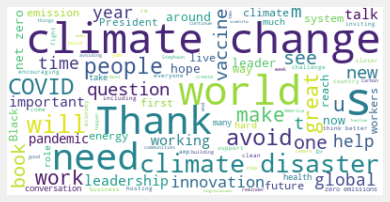

In [57]:
#plot the world cloud
allwords = ' '.join([twts for twts in df['Tweets']])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(allwords)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [62]:
# create a function to compute the neagtive, neutral and positive analysis
def getAnalaysis(score):
    if score < 0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else :
        return 'Positive'

In [63]:
df['Polarity_Analysis'] = df['polarity'].apply(getAnalaysis)
df

,Tweets,subjectivity,polarity,Polarity_Analysis
0,": The , an unprecedented global alliance to de...",0.450000,0.300000,Positive
1,I was honored to speak at today’s LeadersClima...,0.000000,0.000000,Neutral
2,Ambitious short-term goals like this are criti...,0.668750,0.062500,Positive
3,It’s encouraging to see Biden and Kerry re-e...,0.750000,0.450000,Positive
4,Yesterday's verdict was a step in the right di...,0.317262,0.079762,Positive
...,...,...,...,...
95,This book has nothing to do with viruses or pa...,0.966667,0.600000,Positive
96,Monoclonal antibodies are one of the most prom...,0.525714,0.222857,Positive
97,: We’re looking for new ways to advance Alzhei...,0.454545,0.136364,Positive
98,"Like many people, I’ve tried to deepen my unde...",0.458000,0.282000,Positive


In [71]:
# print all the positive tweets
j=1
sortedDf = df.sort_values(by=['polarity'])
for i in range (0, sortedDf.shape[0]):
    if sortedDf['Polarity_Analysis'][i] == 'Positive':
        print(str(j) + ')' +sortedDf['Tweets'][i])
        print()
        j = j+1

1): The , an unprecedented global alliance to develop &amp; deliver the tests, treatments &amp; vaccines the 🌐 needs to fight …

2)Ambitious short-term goals like this are critical to moving closer to a net-zero future. As we rapidly scale the solutions we have, we must also invest in innovation to reach our ultimate goals. Thank you  for your leadership. 

3)It’s encouraging to see  Biden and  Kerry re-establish America’s leading role on climate change. I look forward to joining leaders from around the world to talk about some of the most important challenges we need to overcome to avoid a climate disaster. 

4)Yesterday's verdict was a step in the right direction. But one court ruling alone will not bring to an end the injustice and inequity that Black people experience daily.  I hope we will continue to make real progress on this.

5)“Time” is a poetic portrait of a family who love and support each other despite their difficult circumstances. I can’t recommend it highly enough. 

6)

In [72]:
# print all the positive tweets
j=1
sortedDf = df.sort_values(by=['polarity'])
for i in range (0, sortedDf.shape[0]):
    if sortedDf['Polarity_Analysis'][i] == 'Negative':
        print(str(j) + ')' +sortedDf['Tweets'][i])
        print()
        j = j+1

1)Communities of color have been hit hard by COVID-19. One of the reasons why parts of the medical system often fail Black and brown people is because it’s not designed with them in mind. Dr. Stephaun Wallace wants to change that. 

2)Dr. Stephaun Wallace () has spent the last year helping make COVID-19 vaccines work for everybody. Stephaun and his colleagues at  are working to reach the people who are usually left behind. 

3)It’s deeply unfair that the people who contribute the least to climate change will suffer the worst from its effects:  

4): Over the past few weeks health workers in Ethiopia 🇪🇹, Nigeria 🇳🇬, Sudan 🇸🇩 and the Philippines 🇵🇭 were vaccinated against COVI…

5)For decades, Australian researcher Ruth Bishop led global efforts to identify and combat rotavirus. Her life is a reminder of the importance of scientific research to uncover unknown pathogens and the power of vaccines to prevent suffering and save lives. 

6): Black folks have questions about the COVID-19 vacc

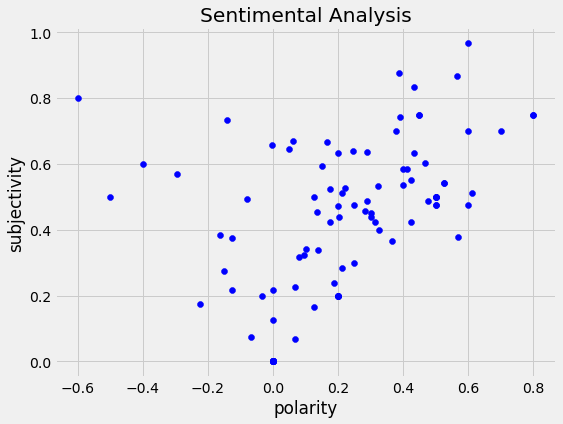

In [75]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['polarity'][i], df['subjectivity'][i], color ='Blue')
plt.title('Sentimental Analysis')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

In [76]:
# get the percentage 
ptweets = df[df.Polarity_Analysis == "Positive"]
ptweets = ptweets['Tweets']
round(ptweets.shape[0]/ df.shape[0]*100,1)

70.0

In [77]:
# get the percentage 
ptweets = df[df.Polarity_Analysis == "Negative"]
ptweets = ptweets['Tweets']
round(ptweets.shape[0]/ df.shape[0]*100,1)

14.0

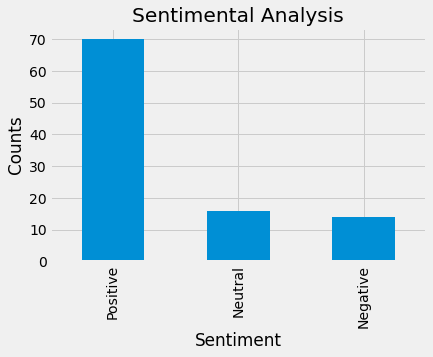

In [78]:
df['Polarity_Analysis'].value_counts()
plt.title('Sentimental Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Polarity_Analysis'].value_counts().plot(kind='bar')
plt.show()